<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;"><a href="http://www.editorialuoc.cat/mineria-de-datos" target="_blank">Minería de datos: Modelos y algoritmos</a></p>
<p style="margin: 0; text-align:right;">Estudios de Informática, Multimedia y Telecomunicación</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Universitat Oberta de Catalunya (<b>UOC</b>)</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# CH6EJ2 Extracción Componentes Principales

## 1. Cargamos y/o instalamos las librerias necesarias

In [15]:
if(!require(devtools)){
    install.packages('devtools', dependencies=c("Depends", "Imports"), repos='http://cran.es.r-project.org')
    require(devtools)
}

Loading required package: devtools

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘devtools’”
also installing the dependencies ‘xml2’, ‘roxygen2’, ‘rversions’





  There are binary versions available but the source versions are later:
          binary source needs_compilation
xml2       1.2.5  1.3.2              TRUE
roxygen2   7.1.0  7.1.1              TRUE
rversions  2.0.1  2.0.2             FALSE
devtools   2.2.2  2.3.2             FALSE



installing the source packages ‘xml2’, ‘roxygen2’, ‘rversions’, ‘devtools’


Warning message in install.packages("devtools", dependencies = c("Depends", "Imports"), :
“installation of package ‘xml2’ had non-zero exit status”
Warning message in install.packages("devtools", dependencies = c("Depends", "Imports"), :
“installation of package ‘roxygen2’ had non-zero exit status”
Warning message in install.packages("devtools", dependencies = c("Depends", "Imports"), :
“installation of package ‘rversions’ had non-zero exit status”
Warning message in install.packages("devtools", dependencies = c("Depends", "Imports"), :
“installation of package ‘devtools’ had non-zero exit status”
Loading required package: devtools

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘devtools’”


## 2. Cargamos los datos de un directorio local.

In [9]:
Alumnos_usos_sociales <- read.csv("../data/B2.332_Students.csv", comment.char="#")

## 3. Cálculo de los componentes principales

In [10]:
# X contiene las variables que queremos trabajar
X <- Alumnos_usos_sociales[,c(31:33)]
head(X)

# Calculamos la componentes principales
Xpca <- princomp(X)

# Observamos el resultado
Xpca
summary(Xpca, loadings=T)

,G1,G2,G3
,<int>,<int>,<int>
1,0,11,11
2,9,11,11
3,12,13,12
4,14,14,14
5,11,13,13
6,12,12,13


Call:
princomp(x = X)

Standard deviations:
   Comp.1    Comp.2    Comp.3 
5.6158957 1.4529456 0.9728683 

 3  variables and  1044 observations.

Importance of components:
                          Comp.1     Comp.2     Comp.3
Standard deviation     5.6158957 1.45294560 0.97286827
Proportion of Variance 0.9116216 0.06102042 0.02735802
Cumulative Proportion  0.9116216 0.97264198 1.00000000

Loadings:
   Comp.1 Comp.2 Comp.3
G1  0.485  0.808  0.335
G2  0.567        -0.824
G3  0.666 -0.589  0.457

## 4. Visualizamos la varianza

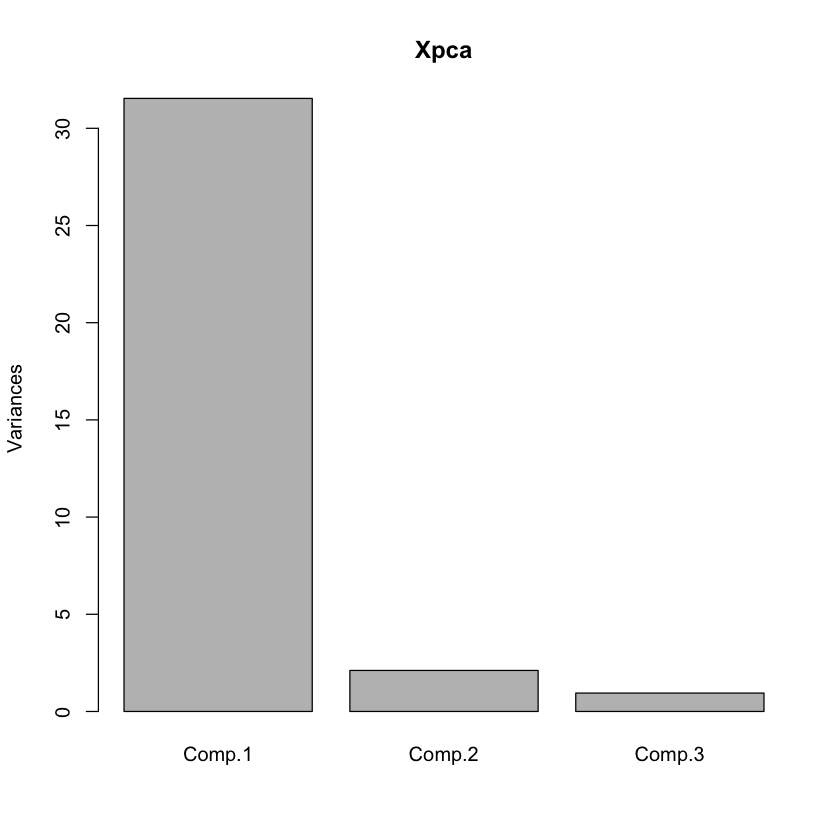

In [11]:
screeplot(Xpca)

## 5. Revisamos los *scores*

In [12]:
head(Xpca$scores)

Comp.1,Comp.2,Comp.3
-5.802002,-8.8581402,-3.7138284
-1.440158,-1.5872269,-0.6958595
1.813841,0.2505845,-0.8800902
4.682246,0.6894117,-0.1187202
1.995246,-1.1466402,-0.7582065
1.912897,-0.3405204,0.4008403


## 6. Visualización de los resultados de PCA 

Creamos un gráfico con dos ejes: 
- Comp. 1 
- Comp. 2

Los colores indican en verde supera la asignatura y en rojo no supera.

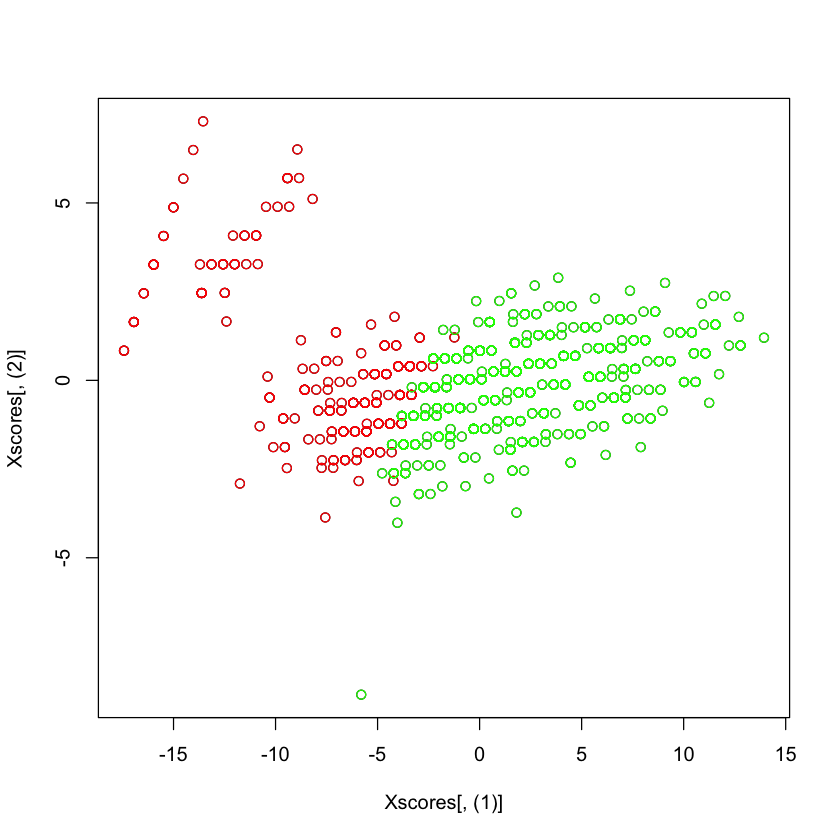

In [13]:
# Asignamos a Y si supera o no el curso
Y <- Alumnos_usos_sociales[,34]

# Dibujamos primero todos los scores de comp1 y comp2
Xscores <- (Xpca$scores)
plot(Xscores[,(1)], Xscores[,(2)])

# Asignamos rojo a 'no supera' y verde a 'si supera'
points(Xscores[Y=="No",1], Xscores[Y=="No",2], col="red")
points(Xscores[Y=="Si",1], Xscores[Y=="Si",2], col="green")

### Visualización mejorada

Ahora visualizaremos el mismo gráfico anterior, pero esta vez generado a traves de `ggbiplot` para mejorar la información.

In [14]:
library(devtools)
install_github("vqv/ggbiplot",options(unzip='internal'))
library(ggbiplot)

X.pca <- prcomp(X)

ggbiplot(X.pca, obs.scale = 1, var.scale = 1,
         groups = Y, ellipse = TRUE, circle = TRUE) +
  scale_color_discrete(name = '') +
  theme(legend.direction = 'horizontal', legend.position = 'top')

ERROR: Error in library(devtools): there is no package called ‘devtools’
